In [3]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np

In [5]:
(x_train,y_train),(x_test,y_test)= keras.datasets.mnist.load_data()


11493376/11490434 [==============================] - 5s 0us/step


In [7]:
len(x_train)

60000

In [8]:
x_train[0].shape

(28, 28)

In [13]:
x_train = x_train/255
x_test = x_test/255

In [14]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [17]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
    
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics = ['accuracy']
             
             )
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4880 - accuracy: 0.8767
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3070 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2856 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2749 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2681 - accuracy: 0.9255


In [19]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2659 - accuracy: 0.9267


[0.26592493057250977, 0.9266999959945679]

In [22]:
y_predicted = model.predict(x_test_flattened)

In [23]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [24]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 953,    0,    1,    2,    0,    6,   12,    3,    3,    0],
       [   0, 1108,    3,    2,    0,    1,    4,    2,   15,    0],
       [   3,    8,  929,   16,    9,    3,   12,   10,   39,    3],
       [   1,    0,   20,  928,    1,   18,    2,   11,   23,    6],
       [   1,    1,    2,    1,  926,    0,   13,    3,   10,   25],
       [   7,    3,    3,   42,   11,  761,   18,    5,   35,    7],
       [   6,    3,    7,    1,    8,   10,  917,    2,    4,    0],
       [   1,    6,   25,    3,   11,    0,    0,  950,    3,   29],
       [   4,    6,    6,   17,    9,   19,   10,   11,  885,    7],
       [   8,    7,    2,   10,   38,    4,    0,   19,   11,  910]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

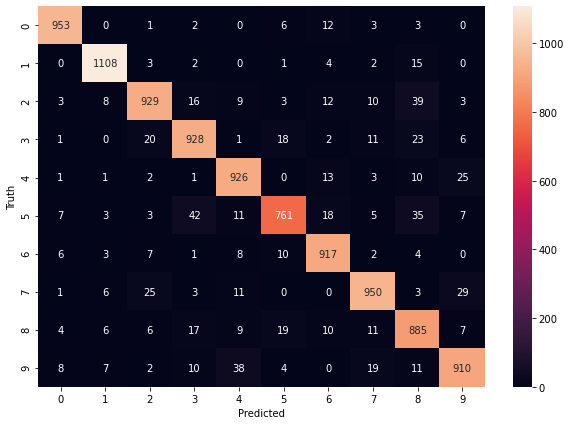

In [25]:
import seaborn as sn 
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')